In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from  scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv('clean_df.csv')

In [3]:
 data = data.drop('Unnamed: 0',axis=1)

In [4]:
def find_nan(df):
    nan_counts = df.isnull().sum()  # Count NaN values for each column
    nan_counts = nan_counts[nan_counts > 0]  # Filter columns with NaN values
    return nan_counts


nan_counts = find_nan(data)
print("NaN counts per column:")
print(nan_counts)


NaN counts per column:
Series([], dtype: int64)


# Task 3 - Experience Analytics

In [5]:
df = data[['bearer_id','imei','msisdn_number','imsi','avg_rtt_dl__ms_','avg_rtt_ul__ms_','avg_bearer_tp_dl__kbps_','avg_bearer_tp_ul__kbps_','tcp_dl_retrans__vol__bytes_','tcp_ul_retrans__vol__bytes_','handset_manufacturer','handset_type','total_ul__bytes_','total_dl__bytes_']]

In [6]:
df

,bearer_id,imei,msisdn_number,imsi,avg_rtt_dl__ms_,avg_rtt_ul__ms_,avg_bearer_tp_dl__kbps_,avg_bearer_tp_ul__kbps_,tcp_dl_retrans__vol__bytes_,tcp_ul_retrans__vol__bytes_,handset_manufacturer,handset_type,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,3.552121e+13,3.366496e+10,2.082014e+14,42.000000,5.000000,23.000000,44.000000,1.719464e+06,47700.605302,samsung,samsung galaxy a5 sm-a520f,3.674974e+07,3.088796e+08
1,13114483482878900224,3.579401e+13,3.368185e+10,2.082019e+14,65.000000,5.000000,16.000000,26.000000,1.719464e+06,47700.605302,samsung,samsung galaxy j5 (sm-j530),5.380039e+07,6.533850e+08
2,13114483484080500736,3.528151e+13,3.376063e+10,2.082003e+14,54.448072,8.786567,6.000000,9.000000,1.719464e+06,47700.605302,samsung,samsung galaxy a8 (2018),2.788364e+07,2.798073e+08
3,13114483485442799616,3.535661e+13,3.375034e+10,2.082014e+14,54.448072,8.786567,44.000000,44.000000,1.719464e+06,47700.605302,undefined,undefined,4.332422e+07,8.460285e+08
4,13114483499480700928,3.540701e+13,3.369980e+10,2.082014e+14,54.448072,8.786567,6.000000,9.000000,1.719464e+06,47700.605302,samsung,samsung sm-g390f,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,3.548311e+13,3.365069e+10,2.082022e+14,32.000000,0.000000,52.000000,65.000000,1.719464e+06,47700.605302,apple,apple iphone 8 plus (a1897),5.762885e+07,5.741753e+08
149997,7349883264234609664,3.566051e+13,3.366345e+10,2.082019e+14,27.000000,2.000000,23.000000,54.000000,1.719464e+06,47700.605302,apple,apple iphone se (a1723),3.913508e+07,6.666488e+08
149998,13114483573367300096,3.572121e+13,3.362189e+10,2.082017e+14,43.000000,6.000000,43.000000,47.000000,1.719464e+06,47700.605302,apple,apple iphone xs (a2097),3.491222e+07,5.927864e+08
149999,13114483573367300096,8.618620e+13,3.361962e+10,2.082021e+14,37.000000,5.000000,34.000000,37.000000,1.719464e+06,47700.605302,huawei,huawei fig-lx1,2.962610e+07,3.718959e+08


In [7]:
d = {'bearer_id':df['bearer_id'],'imsi':df['imsi'].astype(object),'msisdn_number':df['msisdn_number'].astype(object),'imei':df['imei'].astype(object),
    'avg_rtt_ms':df['avg_rtt_dl__ms_']+df['avg_rtt_ul__ms_'],'avg_bearer_tp_kbps':df['avg_bearer_tp_dl__kbps_']+df['avg_bearer_tp_ul__kbps_'],
     'total_tcp_retrans__vol__bytes_':df['tcp_dl_retrans__vol__bytes_']+df['tcp_ul_retrans__vol__bytes_'],
    'handset_manufacturer':df['handset_manufacturer'],'handset_type':df['handset_type'],'totalXdr':df['total_dl__bytes_']+df['total_ul__bytes_']}

In [8]:
data2 = pd.DataFrame(data = d)

In [9]:
data2

,bearer_id,imsi,msisdn_number,imei,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,handset_manufacturer,handset_type,totalXdr
0,13114483460844900352,208201448079117.0,33664962239.0,35521209507511.0,47.000000,67.000000,1.767165e+06,samsung,samsung galaxy a5 sm-a520f,3.456294e+08
1,13114483482878900224,208201909211140.0,33681854413.0,35794009006359.0,70.000000,42.000000,1.767165e+06,samsung,samsung galaxy j5 (sm-j530),7.071854e+08
2,13114483484080500736,208200314458056.0,33760627129.0,35281510359387.0,63.234638,15.000000,1.767165e+06,samsung,samsung galaxy a8 (2018),3.076910e+08
3,13114483485442799616,208201402342131.0,33750343200.0,35356610164913.0,63.234638,88.000000,1.767165e+06,undefined,undefined,8.893527e+08
4,13114483499480700928,208201401415120.0,33699795932.0,35407009745539.0,63.234638,15.000000,1.767165e+06,samsung,samsung sm-g390f,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,208202201200072.0,33650688697.0,35483109451938.0,32.000000,117.000000,1.767165e+06,apple,apple iphone 8 plus (a1897),6.318041e+08
149997,7349883264234609664,208201908153249.0,33663449963.0,35660508296467.0,29.000000,77.000000,1.767165e+06,apple,apple iphone se (a1723),7.057839e+08
149998,13114483573367300096,208201711161187.0,33621890103.0,35721209870907.0,49.000000,90.000000,1.767165e+06,apple,apple iphone xs (a2097),6.276986e+08
149999,13114483573367300096,208202101098075.0,33619622058.0,86186204011457.0,42.000000,71.000000,1.767165e+06,huawei,huawei fig-lx1,4.015220e+08


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  object 
 1   imsi                            150001 non-null  object 
 2   msisdn_number                   150001 non-null  object 
 3   imei                            150001 non-null  object 
 4   avg_rtt_ms                      150001 non-null  float64
 5   avg_bearer_tp_kbps              150001 non-null  float64
 6   total_tcp_retrans__vol__bytes_  150001 non-null  float64
 7   handset_manufacturer            150001 non-null  object 
 8   handset_type                    150001 non-null  object 
 9   totalXdr                        150001 non-null  float64
dtypes: float64(4), object(6)
memory usage: 11.4+ MB


In [11]:
data2.isnull().any()

bearer_id                         False
imsi                              False
msisdn_number                     False
imei                              False
avg_rtt_ms                        False
avg_bearer_tp_kbps                False
total_tcp_retrans__vol__bytes_    False
handset_manufacturer              False
handset_type                      False
totalXdr                          False
dtype: bool

# **Treating outliers**

In [12]:
numeric_columns = data2.select_dtypes(include='number')

In [13]:
numeric_columns

,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,totalXdr
0,47.000000,67.000000,1.767165e+06,3.456294e+08
1,70.000000,42.000000,1.767165e+06,7.071854e+08
2,63.234638,15.000000,1.767165e+06,3.076910e+08
3,63.234638,88.000000,1.767165e+06,8.893527e+08
4,63.234638,15.000000,1.767165e+06,6.076814e+08
...,...,...,...,...
149996,32.000000,117.000000,1.767165e+06,6.318041e+08
149997,29.000000,77.000000,1.767165e+06,7.057839e+08
149998,49.000000,90.000000,1.767165e+06,6.276986e+08
149999,42.000000,71.000000,1.767165e+06,4.015220e+08


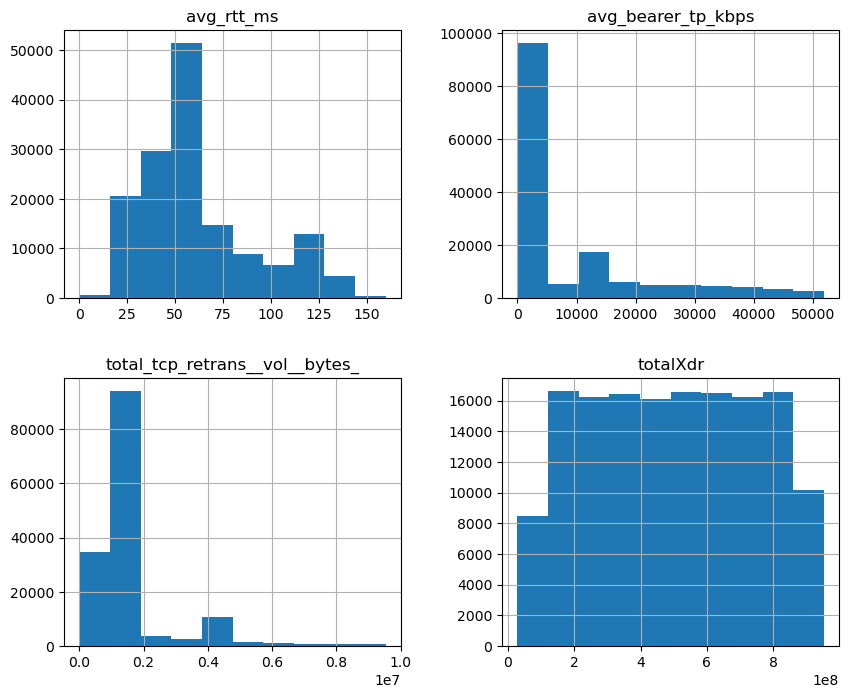

In [14]:
numeric_columns.hist(figsize=(10,8), bins=10);

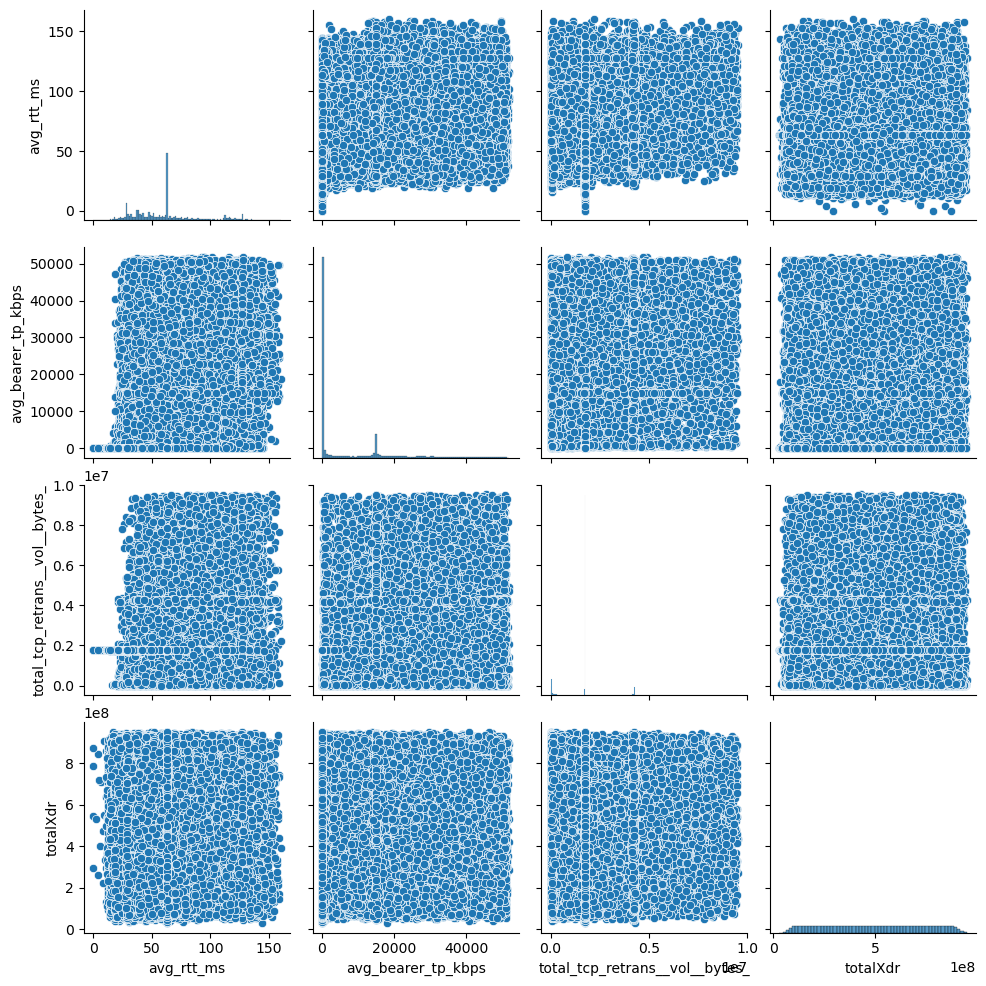

In [15]:
sns.pairplot(numeric_columns)

**detecting outliers using iqr**

In [16]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

avg_rtt_ms                        3.400000e+01
avg_bearer_tp_kbps                1.498047e+04
total_tcp_retrans__vol__bytes_    3.801958e+05
totalXdr                          4.220658e+08
dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17252\1329677035.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data2.quantile(0.25)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17252\1329677035.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data2.quantile(0.75)


**getting columns with outliers**

In [17]:
(((data2 < (Q1 - 1.5 * IQR)) |(data2 > (Q3 + 1.5 * IQR)))==True).any()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17252\2284402678.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (((data2 < (Q1 - 1.5 * IQR)) |(data2 > (Q3 + 1.5 * IQR)))==True).any()


avg_bearer_tp_kbps                 True
avg_rtt_ms                         True
bearer_id                         False
handset_manufacturer              False
handset_type                      False
imei                              False
imsi                              False
msisdn_number                     False
totalXdr                          False
total_tcp_retrans__vol__bytes_     True
dtype: bool

**replacing outliers with the mean of the corresponding columns**

In [18]:
def outlier_replace(df, cols):
    for col in cols:
        df[cols] = np.where(((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))), df[cols].mean(), df[cols])

In [19]:
outlier_replace(data2,numeric_columns.columns.to_list())

In [20]:
(((data2 < (Q1 - 1.5 * IQR)) |(data2 > (Q3 + 1.5 * IQR)))==True).any()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17252\2284402678.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (((data2 < (Q1 - 1.5 * IQR)) |(data2 > (Q3 + 1.5 * IQR)))==True).any()


avg_bearer_tp_kbps                False
avg_rtt_ms                        False
bearer_id                         False
handset_manufacturer              False
handset_type                      False
imei                              False
imsi                              False
msisdn_number                     False
totalXdr                          False
total_tcp_retrans__vol__bytes_    False
dtype: bool

In [21]:

def remove_outliers(df, column_name):
    
    # Calculate mean and standard deviation
    mean_value = df[column_name].mean()
    std_value = df[column_name].std()

    # Define threshold range
    lower_threshold = mean_value - 3 * std_value
    upper_threshold = mean_value + 3 * std_value

    # Filter out values outside the threshold range
    filtered_df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]

    return filtered_df

column_name = 'total_tcp_retrans__vol__bytes_'  # Replace 'Your_Column_Name' with the actual column name
filtered_df = remove_outliers(numeric_columns, column_name)


In [22]:
numeric_columns['total_tcp_retrans__vol__bytes_'].describe()

count    1.500010e+05
mean     1.767165e+06
std      1.385084e+06
min      8.600000e+01
25%      1.386969e+06
50%      1.767165e+06
75%      1.767165e+06
max      9.538762e+06
Name: total_tcp_retrans__vol__bytes_, dtype: float64

**here we found that outliers is remove from the data set** 

# Task 3. 1 - Aggregate, per customer, the following information
●	Average TCP retransmission
●	Average RTT
●	Handset type
●	Average throughput


In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  object 
 1   imsi                            150001 non-null  object 
 2   msisdn_number                   150001 non-null  object 
 3   imei                            150001 non-null  object 
 4   avg_rtt_ms                      150001 non-null  float64
 5   avg_bearer_tp_kbps              150001 non-null  float64
 6   total_tcp_retrans__vol__bytes_  150001 non-null  float64
 7   handset_manufacturer            150001 non-null  object 
 8   handset_type                    150001 non-null  object 
 9   totalXdr                        150001 non-null  float64
dtypes: float64(4), object(6)
memory usage: 11.4+ MB


In [24]:
data2.isnull().any()

bearer_id                         False
imsi                              False
msisdn_number                     False
imei                              False
avg_rtt_ms                        False
avg_bearer_tp_kbps                False
total_tcp_retrans__vol__bytes_    False
handset_manufacturer              False
handset_type                      False
totalXdr                          False
dtype: bool

In [25]:
# Group by customer identifier
grouped_data = data2.groupby('bearer_id')

In [26]:
# Calculate aggregates
aggregated_data = grouped_data.agg({
    'total_tcp_retrans__vol__bytes_': 'mean',  # Average TCP retransmission volume
    'avg_rtt_ms': 'mean',  # Average Round-Trip Time (RTT)
    'handset_type': lambda x: x.value_counts().idxmax(),  # Most common handset type
    'avg_bearer_tp_kbps': 'mean'  # Average throughput
})

In [27]:
# Rename columns for clarity
aggregated_data = aggregated_data.rename(columns={
    'total_tcp_retrans__vol__bytes_': 'avg_tcp_retransmission',
    'avg_rtt_ms': 'avg_rtt',
    'avg_bearer_tp_kbps': 'avg_throughput'})

In [28]:
aggregated_data.sort_values(by='avg_rtt', ascending=False)

,avg_tcp_retransmission,avg_rtt,handset_type,avg_throughput
bearer_id,,,,
6917537685834179584,1.767165e+06,125.0,huawei p20 pro,16155.000000
13042425970243500032,1.767165e+06,125.0,huawei e5180,28156.428647
6917537694552049664,1.767165e+06,125.0,huawei honor,9267.000000
7277825666897779712,1.767165e+06,125.0,huawei e5573b,19947.428647
7349883249392230400,1.722052e+06,125.0,apple iphone 6s plus (a1687),92.000000
...,...,...,...,...
7349883254809620480,1.767165e+06,2.0,apple iphone x (a1901),113.000000
7349883264038670336,1.767165e+06,0.0,apple iphone 6 (a1586),100.000000
7349883261389169664,1.767165e+06,0.0,huawei pct-l29,85.000000


# Task 3.2 - Compute & list 10 of the top, bottom, and most frequent:
- a.	TCP values in the dataset. 
- b.	RTT values in the dataset.
- c.	Throughput values in the dataset.


# TCP values in the dataset. 

In [29]:
# Compute top, bottom, and most frequent TCP values
top_tcp_values = data2['total_tcp_retrans__vol__bytes_'].nlargest(10).reset_index().drop('index',axis=1)
bottom_tcp_values = data2['total_tcp_retrans__vol__bytes_'].drop_duplicates().nsmallest(10).reset_index().drop('index',axis=1)
most_frequent_tcp_values = data2['total_tcp_retrans__vol__bytes_'].mode().reset_index().drop('index',axis=1)
print("Top TCP Values:")
print(top_tcp_values)
print("\nBottom TCP Values:")
print(bottom_tcp_values)
print("\nMost Frequent TCP Values:")
print(most_frequent_tcp_values)


Top TCP Values:
   total_tcp_retrans__vol__bytes_
0                    2.337381e+06
1                    2.337275e+06
2                    2.337055e+06
3                    2.336913e+06
4                    2.336907e+06
5                    2.336865e+06
6                    2.336605e+06
7                    2.336553e+06
8                    2.336367e+06
9                    2.336229e+06

Bottom TCP Values:
   total_tcp_retrans__vol__bytes_
0                        817031.0
1                        817121.0
2                        817496.0
3                        817584.0
4                        817588.0
5                        817744.0
6                        817801.0
7                        817839.0
8                        817855.0
9                        817893.0

Most Frequent TCP Values:
   total_tcp_retrans__vol__bytes_
0                    1.767165e+06


# RTT values in the dataset.

In [30]:
# Compute top, bottom, and most frequent RTT values
top_rtt_values = data2['avg_rtt_ms'].nlargest(10).reset_index().drop('index',axis=1)
bottom_rtt_values = data2['avg_rtt_ms'].drop_duplicates().nsmallest(10).reset_index().drop('index',axis=1)
most_frequent_rtt_values = data2['avg_rtt_ms'].mode().reset_index().drop('index',axis=1)
print("\nTop RTT Values:")
print(top_rtt_values)
print("\nBottom RTT Values:")
print(bottom_rtt_values)
print("\nMost Frequent RTT Values:")
print(most_frequent_rtt_values)


Top RTT Values:
   avg_rtt_ms
0       125.0
1       125.0
2       125.0
3       125.0
4       125.0
5       125.0
6       125.0
7       125.0
8       125.0
9       125.0

Bottom RTT Values:
   avg_rtt_ms
0         0.0
1         2.0
2         4.0
3         5.0
4         6.0
5         7.0
6         8.0
7         9.0
8        10.0
9        11.0

Most Frequent RTT Values:
   avg_rtt_ms
0   63.234638


# Throughput values in the dataset.

In [31]:
# Compute top, bottom, and most frequent throughput values
top_throughput_values = data2['avg_bearer_tp_kbps'].nlargest(10).reset_index().drop('index',axis=1)
bottom_throughput_values = data2['avg_bearer_tp_kbps'].drop_duplicates().nsmallest(10).reset_index().drop('index',axis=1)
most_frequent_throughput_values = data2['avg_bearer_tp_kbps'].mode().reset_index().drop('index',axis=1)
print("\nTop Throughput Values:")
print(top_throughput_values)
print("\nBottom Throughput Values:")
print(bottom_throughput_values)
print("\nMost Frequent Throughput Values:")
print(most_frequent_throughput_values)



Top Throughput Values:
   avg_bearer_tp_kbps
0        37540.428647
1        37539.428647
2        37538.000000
3        37537.428647
4        37535.000000
5        37533.000000
6        37532.428647
7        37531.428647
8        37531.428647
9        37531.000000

Bottom Throughput Values:
   avg_bearer_tp_kbps
0                 0.0
1                 1.0
2                 2.0
3                 3.0
4                 4.0
5                 5.0
6                 6.0
7                 7.0
8                 8.0
9                 9.0

Most Frequent Throughput Values:
   avg_bearer_tp_kbps
0         8511.991007


**Observation :**
    1. All top Tens in the Network Parameters Values are in the same range

# Task 3.3 - Compute & report:
 - a.	The distribution of the average throughput per handset type and provide interpretation for your findings.
-  e.	The average TCP retransmission view per handset type and provide interpretation for your findings.


In [32]:

# Assuming df is your DataFrame containing the dataset

# Compute the average throughput and average TCP retransmission volume per handset type
handset_stats = data2.groupby('handset_type').agg({
    'avg_bearer_tp_kbps': 'mean',  # Average throughput
    'total_tcp_retrans__vol__bytes_': 'mean'  # Average TCP retransmission volume
})


In [33]:
handset_stats.reset_index()
handset_stats.rename(columns = {'avg_bearer_tp_kbps':'handset_avg_trp','total_tcp_retrans__vol__bytes_':'handset_avg_tcp'}, inplace = True)
handset_stats.reset_index(inplace = True)

In [34]:
handset_stats

,handset_type,handset_avg_trp,handset_avg_tcp
0,a-link telecom i. cubot a5,23510.000000,1.767165e+06
1,a-link telecom i. cubot note plus,6699.000000,1.767165e+06
2,a-link telecom i. cubot note s,8937.000000,1.767165e+06
3,a-link telecom i. cubot nova,13850.045927,1.767165e+06
4,a-link telecom i. cubot power,13642.045927,1.767165e+06
...,...,...,...
1391,zte starxtrem by sfr,888.000000,1.771069e+06
1392,zte zte blade c2 smartphone android by sfr sta...,58.000000,1.767165e+06
1393,zyxel communicat. lte7460,8511.991007,1.767165e+06
1394,zyxel communicat. sbg3600,15070.474573,1.767165e+06


**The distribution of the average throughput per handset type**

In [35]:
avg_trp_handset = handset_stats.iloc[:,0:2].sort_values(by='handset_avg_trp', ascending=False)
avg_trp_handset

,handset_type,handset_avg_trp
501,lemobile informa. le x527,37042.428647
1109,sony mobile comm. sony xperia z (c6603),35636.000000
760,oppo a33f,34922.000000
841,samsung galaxy a6 (sm-a605f),34804.428647
603,lg-h791,34522.428647
...,...,...
803,quectel wireless. quectel ec21-e,2.000000
1225,test imei,2.000000
804,quectel wireless. quectel ec25-e,1.000000
589,lg lg-t385,0.000000


Text(0.5, 1.0, 'Distribution of Average Througput per handset')

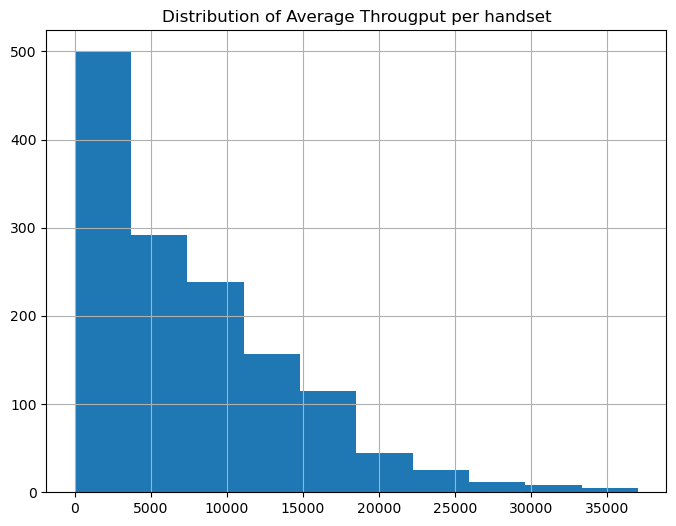

In [36]:
avg_trp_handset.hist(figsize=(8, 6))
plt.title('Distribution of Average Througput per handset', fontsize=12)

**Observation:The distribution is right skewed ,This means that there are more handset owners who have below average throughput. There are handset owners with no throughput**

**The average TCP retransmission view per handset type.**

In [37]:
avg_tcp_handset = handset_stats.drop('handset_avg_trp',axis=1).sort_values(by='handset_avg_tcp', ascending=False)
avg_tcp_handset

,handset_type,handset_avg_tcp
807,razer inc razer phone,2197533.0
1188,tcl communicatio. alcatel pixi 4 (5) 5010e,2194061.0
1358,xiaomi communica. redmi note 2,2192488.0
667,meizu technology. pro 7,2183984.0
158,beijing shenqi t. z2 pro,2161696.0
...,...,...
420,huawei p8max,925563.0
311,huawei ascend y600,909879.0
717,nokia 925.1 925.4 lumia 925 nokia 925,883548.0
567,lephone u pro,862301.0


Text(0.5, 1.0, 'Distribution of Average TCP per handset')

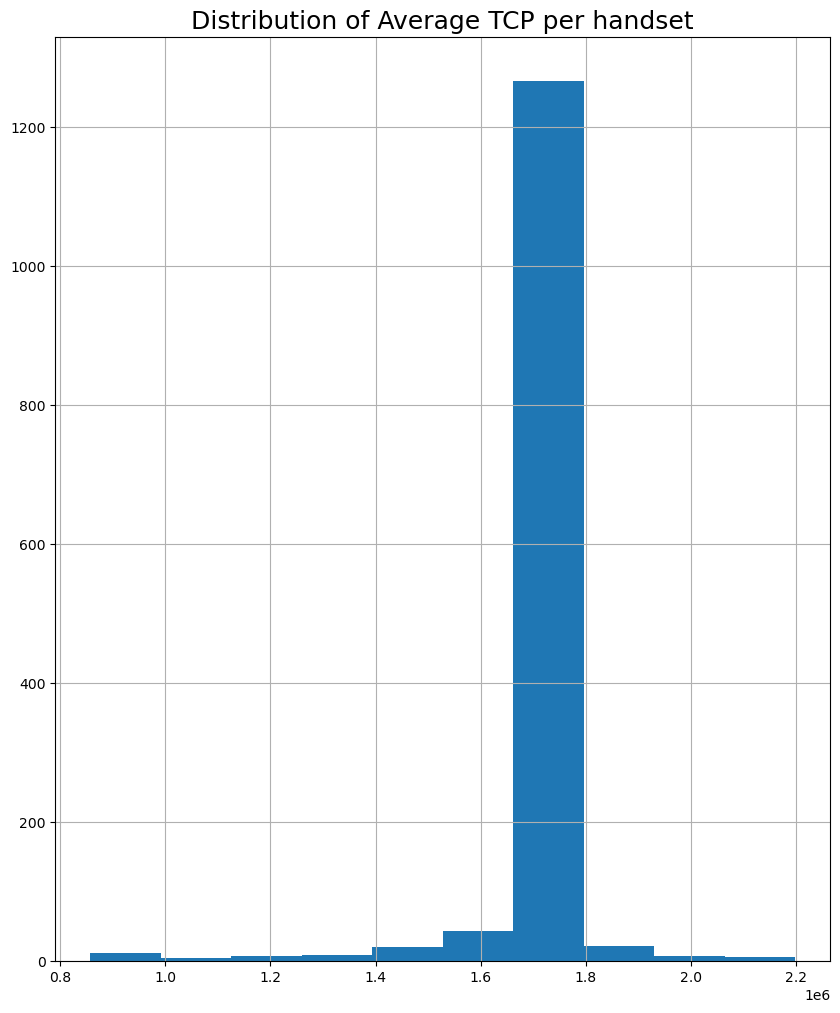

In [38]:
avg_tcp_handset.hist(figsize=(10, 12))
plt.title('Distribution of Average TCP per handset', fontsize=18)


# Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [39]:
exp_metrics_no_cluster = data2.groupby('msisdn_number').aggregate({'avg_rtt_ms':'sum','avg_bearer_tp_kbps':'sum',
                                                              'total_tcp_retrans__vol__bytes_':'sum',
                                                              'handset_type':'count'})

In [40]:
exp_metrics_no_cluster = exp_metrics_no_cluster.reset_index()

In [41]:
exp_metrics_no_cluster

,msisdn_number,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,handset_type
0,3.360100e+10,46.000000,76.000000,1.767165e+06,1
1,3.360100e+10,31.000000,99.000000,1.767165e+06,1
2,3.360100e+10,63.234638,97.000000,1.767165e+06,1
3,3.360101e+10,84.000000,248.000000,1.767165e+06,1
4,3.360101e+10,119.000000,8574.991007,3.534330e+06,2
...,...,...,...,...,...
106851,3.379000e+10,52.000000,10365.000000,1.767165e+06,1
106852,3.379000e+10,40.000000,116.000000,1.767165e+06,1
106853,3.197021e+12,63.234638,1.000000,1.767165e+06,1
106854,3.370000e+14,63.234638,33.000000,1.767165e+06,1


In [42]:
exp_metrics_no_cluster.columns = ['users', 'rtt_sum', 'trp_sum', 'tcp_sum', 'handset_count']
exp_metrics_no_cluster


,users,rtt_sum,trp_sum,tcp_sum,handset_count
0,3.360100e+10,46.000000,76.000000,1.767165e+06,1
1,3.360100e+10,31.000000,99.000000,1.767165e+06,1
2,3.360100e+10,63.234638,97.000000,1.767165e+06,1
3,3.360101e+10,84.000000,248.000000,1.767165e+06,1
4,3.360101e+10,119.000000,8574.991007,3.534330e+06,2
...,...,...,...,...,...
106851,3.379000e+10,52.000000,10365.000000,1.767165e+06,1
106852,3.379000e+10,40.000000,116.000000,1.767165e+06,1
106853,3.197021e+12,63.234638,1.000000,1.767165e+06,1
106854,3.370000e+14,63.234638,33.000000,1.767165e+06,1


In [43]:
exp_metrics = exp_metrics_no_cluster.drop(columns='users')# inplace=True)
exp_metrics

,rtt_sum,trp_sum,tcp_sum,handset_count
0,46.000000,76.000000,1.767165e+06,1
1,31.000000,99.000000,1.767165e+06,1
2,63.234638,97.000000,1.767165e+06,1
3,84.000000,248.000000,1.767165e+06,1
4,119.000000,8574.991007,3.534330e+06,2
...,...,...,...,...
106851,52.000000,10365.000000,1.767165e+06,1
106852,40.000000,116.000000,1.767165e+06,1
106853,63.234638,1.000000,1.767165e+06,1
106854,63.234638,33.000000,1.767165e+06,1


In [44]:
#Normalising with minmax scaler
scaler = MinMaxScaler()
scaled_metrics = scaler.fit_transform(exp_metrics)

In [45]:
scaled_metrics

array([[5.83398072e-04, 7.97154190e-06, 5.03664097e-04, 0.00000000e+00],
       [3.93159570e-04, 1.03839822e-05, 5.03664097e-04, 0.00000000e+00],
       [8.01977526e-04, 1.01742048e-05, 5.03664097e-04, 0.00000000e+00],
       ...,
       [8.01977526e-04, 1.04888709e-07, 5.03664097e-04, 0.00000000e+00],
       [8.01977526e-04, 3.46132740e-06, 5.03664097e-04, 0.00000000e+00],
       [8.01977526e-04, 2.09777418e-07, 5.03664097e-04, 0.00000000e+00]])

In [46]:
# Perform K-means on Scaled metrics values
km = KMeans()
km

KMeans()

In [47]:
data_scaled = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_metrics)
    data_scaled.append(km.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

In [48]:
data_scaled

[4.461151381416923,
 0.4675920529696952,
 0.25389910357589013,
 0.16397168455683814,
 0.12485884499628622,
 0.09710185030342787,
 0.08321558481497722,
 0.07076326877277002,
 0.0628911508137095,
 0.05527033672486279]

# Plot WIthin Sum of Squared Distances

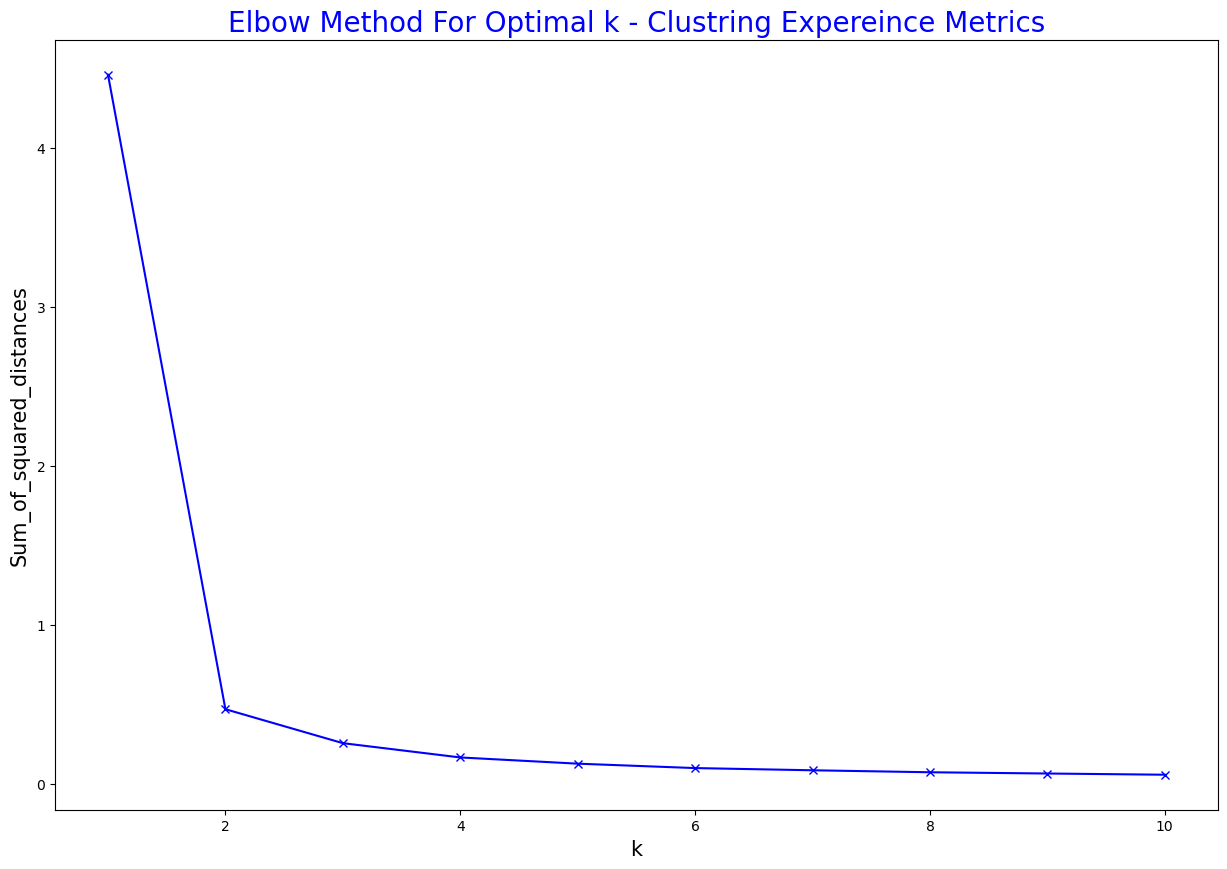

In [49]:
plt.subplots(figsize=(15, 10))
plt.plot(K, data_scaled, 'bx-')
plt.xlabel('k', fontsize=15)
plt.ylabel('Sum_of_squared_distances', fontsize=15)
plt.title('Elbow Method For Optimal k - Clustring Expereince Metrics', fontsize=20, color='b')
plt.show()

In [50]:
#Get clusters for Scaled Metrics

km2 = KMeans(n_clusters = 3, random_state=0)
clusters = km2.fit(scaled_metrics).cluster_centers_

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
clusters

array([[9.15085028e-04, 6.38864877e-04, 7.37932450e-04, 2.40658395e-04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.06892936e-03, 5.31860643e-03, 2.67628121e-03, 2.20751377e-03]])

In [52]:
#save cluster_centers to csv

exp_centroids = pd.DataFrame(clusters)
exp_centroids.to_csv('experience_centroids.csv')

In [53]:
#Get labels

set(km2.labels_)

{0, 1, 2}

In [54]:
#Assign labels to metrics

exp_metrics['clusters'] = km2.labels_
exp_metrics

,rtt_sum,trp_sum,tcp_sum,handset_count,clusters
0,46.000000,76.000000,1.767165e+06,1,0
1,31.000000,99.000000,1.767165e+06,1,0
2,63.234638,97.000000,1.767165e+06,1,0
3,84.000000,248.000000,1.767165e+06,1,0
4,119.000000,8574.991007,3.534330e+06,2,0
...,...,...,...,...,...
106851,52.000000,10365.000000,1.767165e+06,1,0
106852,40.000000,116.000000,1.767165e+06,1,0
106853,63.234638,1.000000,1.767165e+06,1,0
106854,63.234638,33.000000,1.767165e+06,1,0


In [55]:
#save expereince cluster as csv
experience_cluster=exp_metrics.merge(exp_metrics_no_cluster.users, how='inner',right_index=True, left_index=True, )
experience_cluster

,rtt_sum,trp_sum,tcp_sum,handset_count,clusters,users
0,46.000000,76.000000,1.767165e+06,1,0,3.360100e+10
1,31.000000,99.000000,1.767165e+06,1,0,3.360100e+10
2,63.234638,97.000000,1.767165e+06,1,0,3.360100e+10
3,84.000000,248.000000,1.767165e+06,1,0,3.360101e+10
4,119.000000,8574.991007,3.534330e+06,2,0,3.360101e+10
...,...,...,...,...,...,...
106851,52.000000,10365.000000,1.767165e+06,1,0,3.379000e+10
106852,40.000000,116.000000,1.767165e+06,1,0,3.379000e+10
106853,63.234638,1.000000,1.767165e+06,1,0,3.197021e+12
106854,63.234638,33.000000,1.767165e+06,1,0,3.370000e+14


In [56]:
experience_cluster.to_csv('experience_cluster.csv')

In [57]:
len(scaled_metrics)

106856

# Group by Clusters

- Find minimum, maximum, average and total non-normalized metrics for each clusters

In [58]:
# RTT Experience

rtt_exp = exp_metrics.groupby('clusters')['rtt_sum'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)
rtt_exp = rtt_exp.apply(lambda x: np.log(x)).sort_values(by='sum', ascending=False)
rtt_exp

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,min,max,mean,sum
0,-inf,5.978368,4.278514,15.792978
2,3.970292,6.967909,5.487042,14.297054
1,11.275282,11.275282,11.275282,11.275282


<Figure size 5000x6000 with 0 Axes>

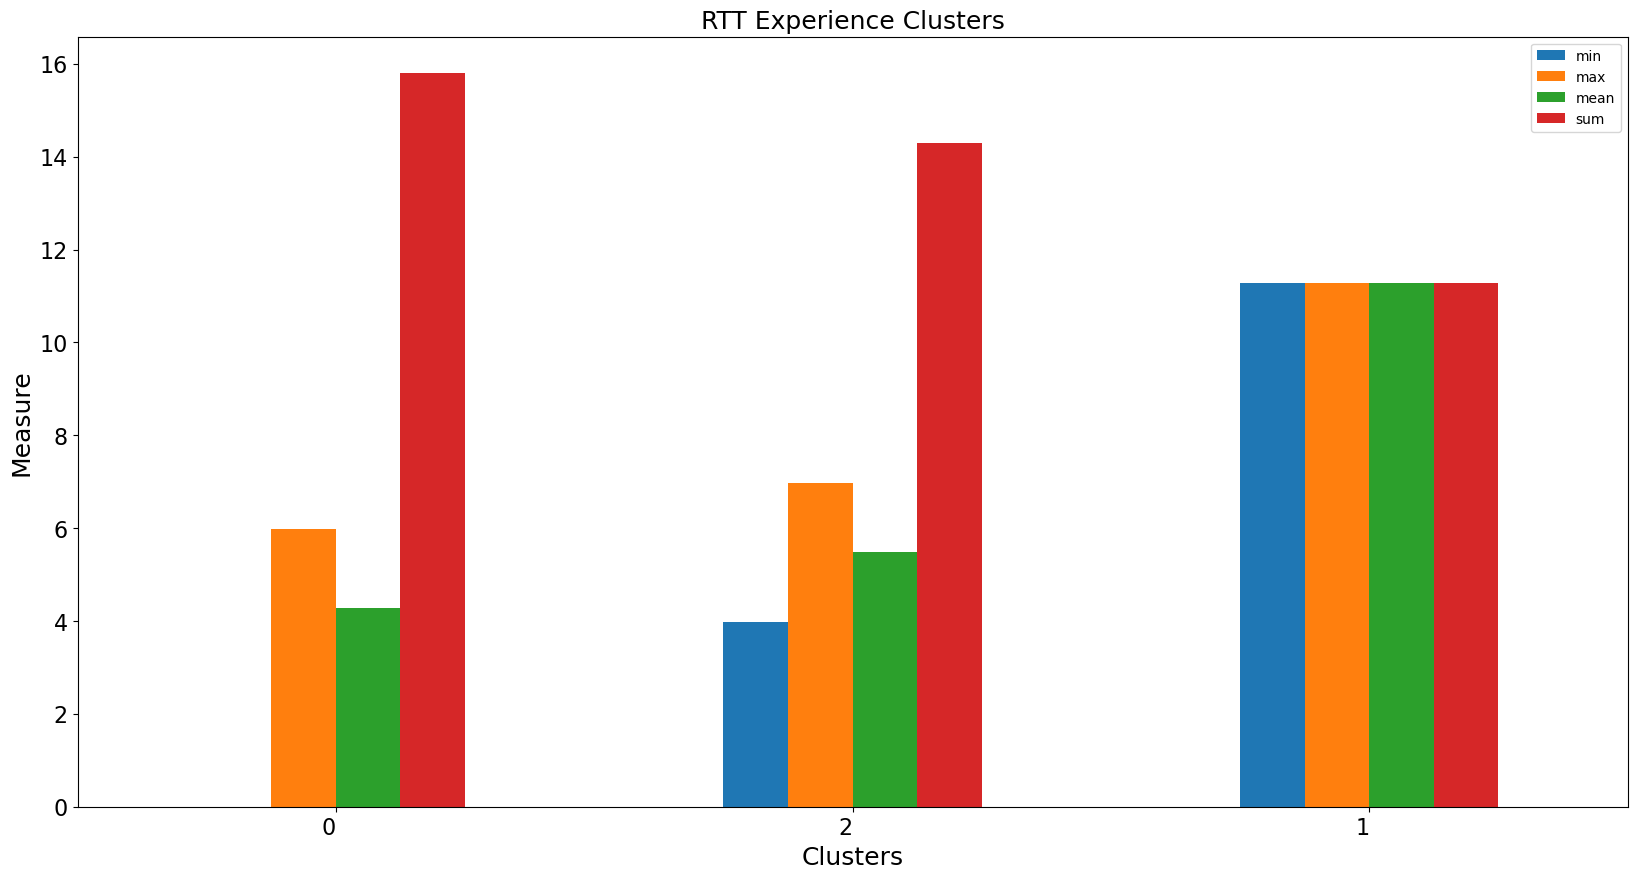

In [59]:
plt.figure(figsize=(50,60))
# topAppsAggLog.plot(figsize=(5,5));
ax= rtt_exp.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("RTT Experience Clusters", fontsize=18)
plt.xticks(fontsize=16, rotation =0)
plt.yticks(fontsize=16) 
plt.xlabel('Clusters', fontsize=18)
plt.ylabel('Measure', fontsize=18)
plt.show()

- On average customers in clusters 0 have better RTT expereince than other clusters 
- Customers in cluster 1 on average have the lowest RTT experience 

# Throughput Experience

In [60]:
trp_exp = exp_metrics.groupby('clusters')['trp_sum'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)
trp_exp = trp_exp.apply(lambda x: np.log(x)).sort_values(by='sum', ascending=False)
trp_exp

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,min,max,mean,sum
0,-inf,10.533174,8.713349,20.227814
2,3.737670,12.352505,10.832164,19.642176
1,16.070366,16.070366,16.070366,16.070366


<Figure size 5000x6000 with 0 Axes>

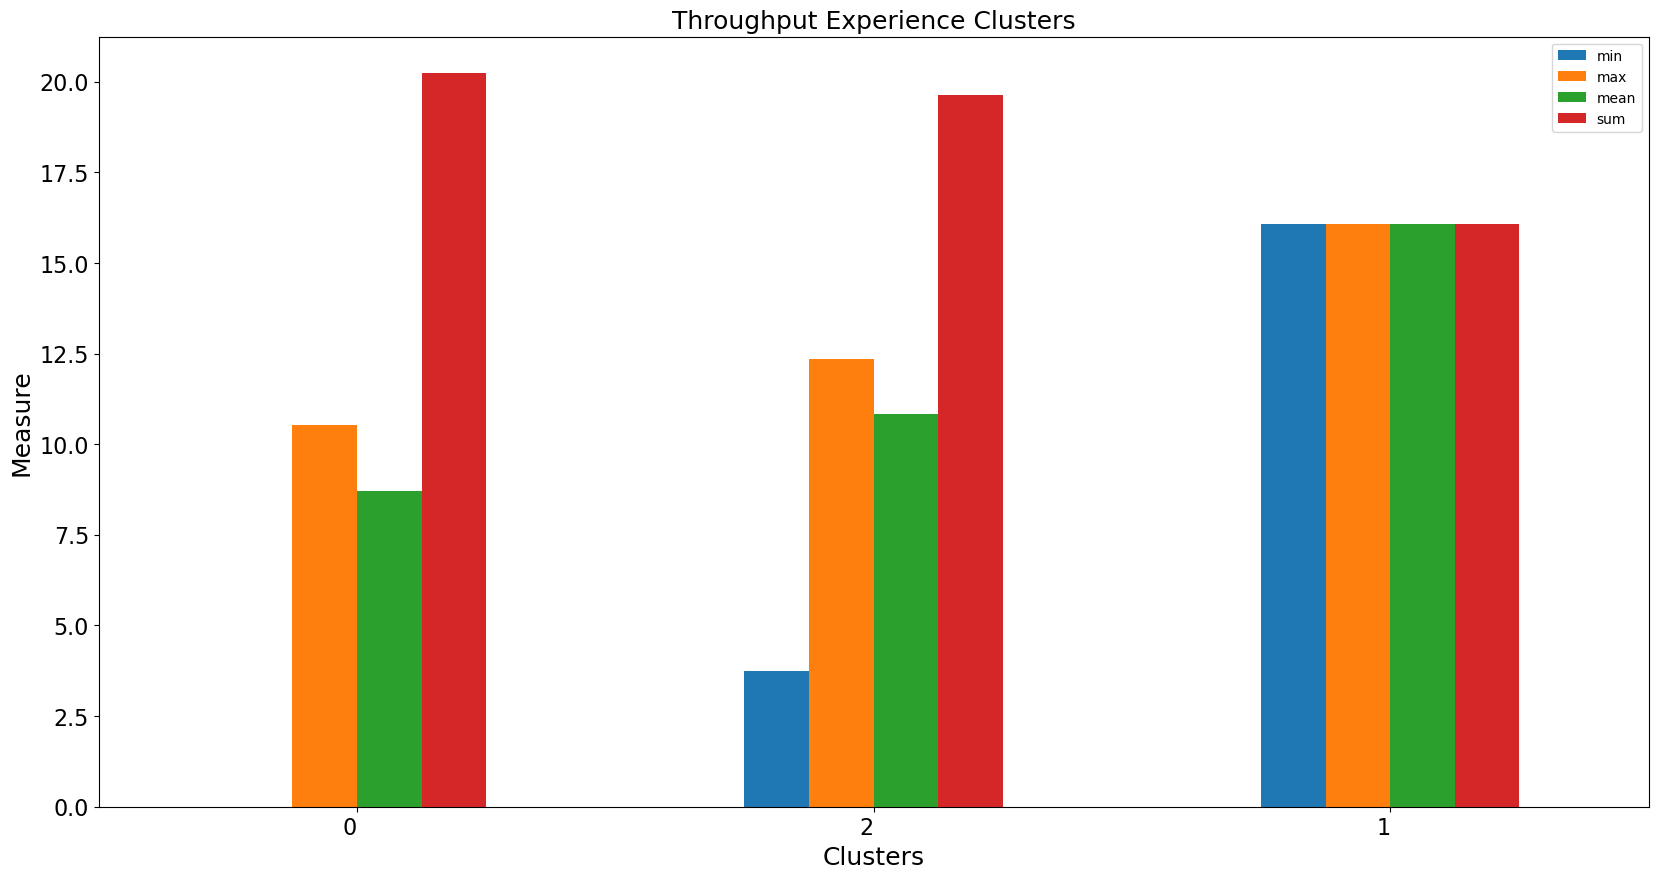

In [61]:
plt.figure(figsize=(50,60))
# topAppsAggLog.plot(figsize=(5,5));
ax= trp_exp.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("Throughput Experience Clusters", fontsize=18)
plt.xticks(fontsize=16, rotation =0)
plt.yticks(fontsize=16) 
plt.xlabel('Clusters', fontsize=18)
plt.ylabel('Measure', fontsize=18)
plt.show()

- On average customers in cluster 0 have better Throughput expereince than other clusters 
- Customers in cluster 1 on average have the lowest Throughput experience

# TCP Experience

In [63]:
tcp_exp = exp_metrics.groupby('clusters')['tcp_sum'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)
tcp_exp = tcp_exp.apply(lambda x: np.log(x)).sort_values(by='sum', ascending=False)
tcp_exp

,min,max,mean,sum
0,13.613432,16.140763,14.607918,26.122382
2,14.348004,17.218100,15.582929,24.392941
1,21.358392,21.358392,21.358392,21.358392


<Figure size 5000x6000 with 0 Axes>

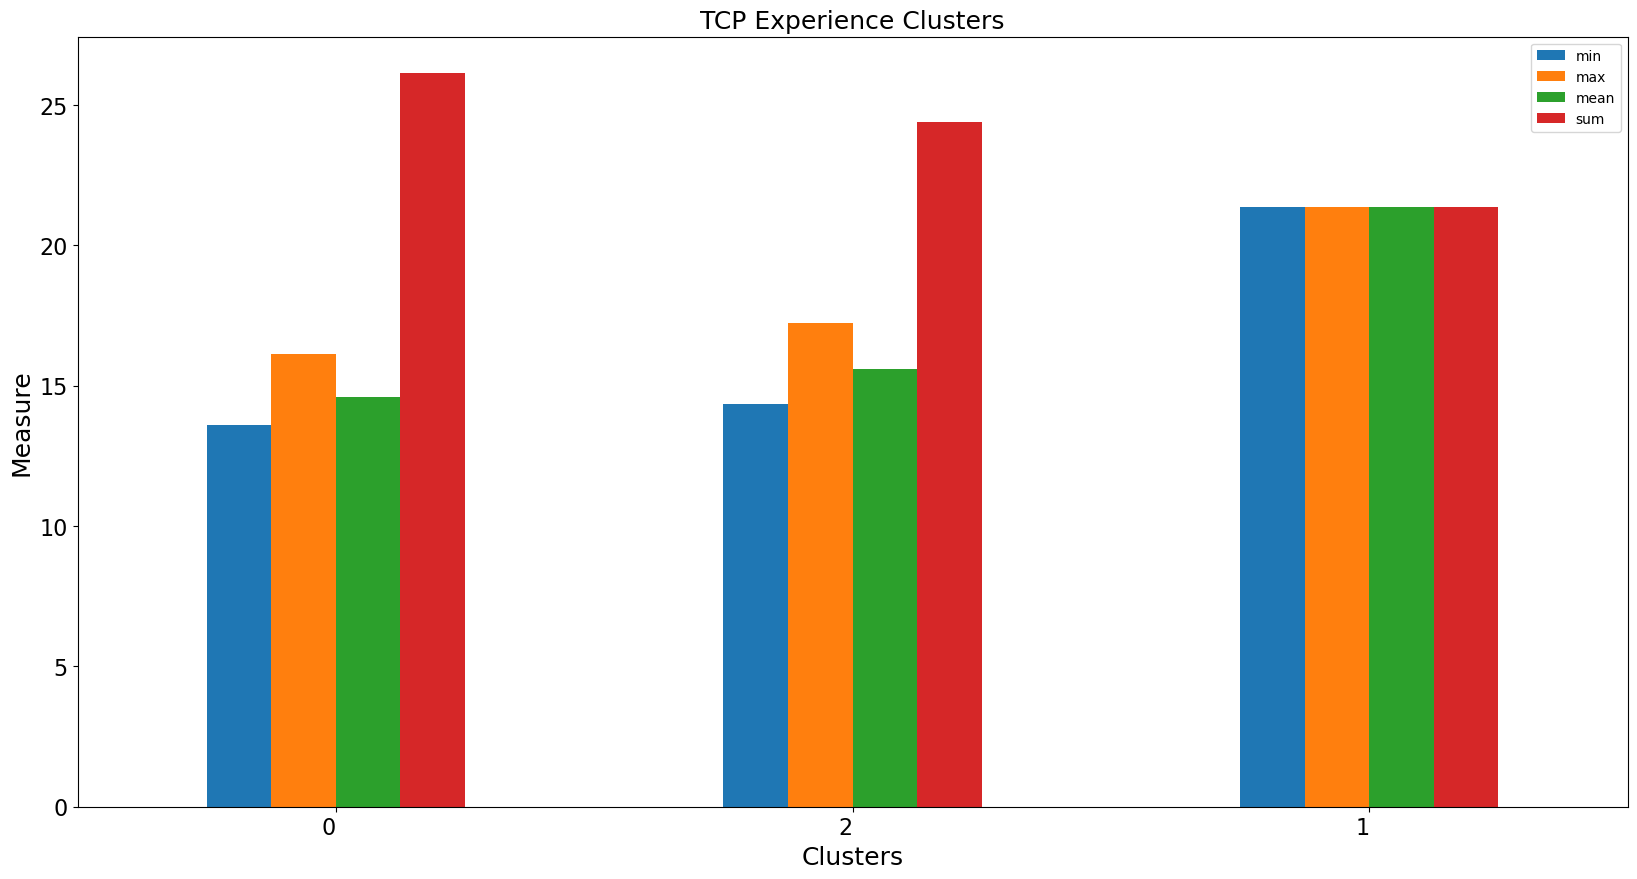

In [64]:
plt.figure(figsize=(50,60))
# topAppsAggLog.plot(figsize=(5,5));
ax= tcp_exp.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("TCP Experience Clusters", fontsize=18)
plt.xticks(fontsize=16, rotation =0)
plt.yticks(fontsize=16) 
plt.xlabel('Clusters', fontsize=18)
plt.ylabel('Measure', fontsize=18)
plt.show()

- On average customers in clusters 0 have better TCP Transmission expereince than other clusters 

- Customers in cluster 1 on average have the lowest TCP Transmission experience 

# Handset Experience

In [65]:
hands_exp = exp_metrics.groupby('clusters')['handset_count'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)
hands_exp = hands_exp.apply(lambda x: np.log(x)).sort_values(by='sum', ascending=False)
hands_exp

,min,max,mean,sum
0,0.000000,1.791759,0.231428,11.745893
2,0.693147,2.833213,1.219359,10.029371
1,6.988413,6.988413,6.988413,6.988413


<Figure size 5000x6000 with 0 Axes>

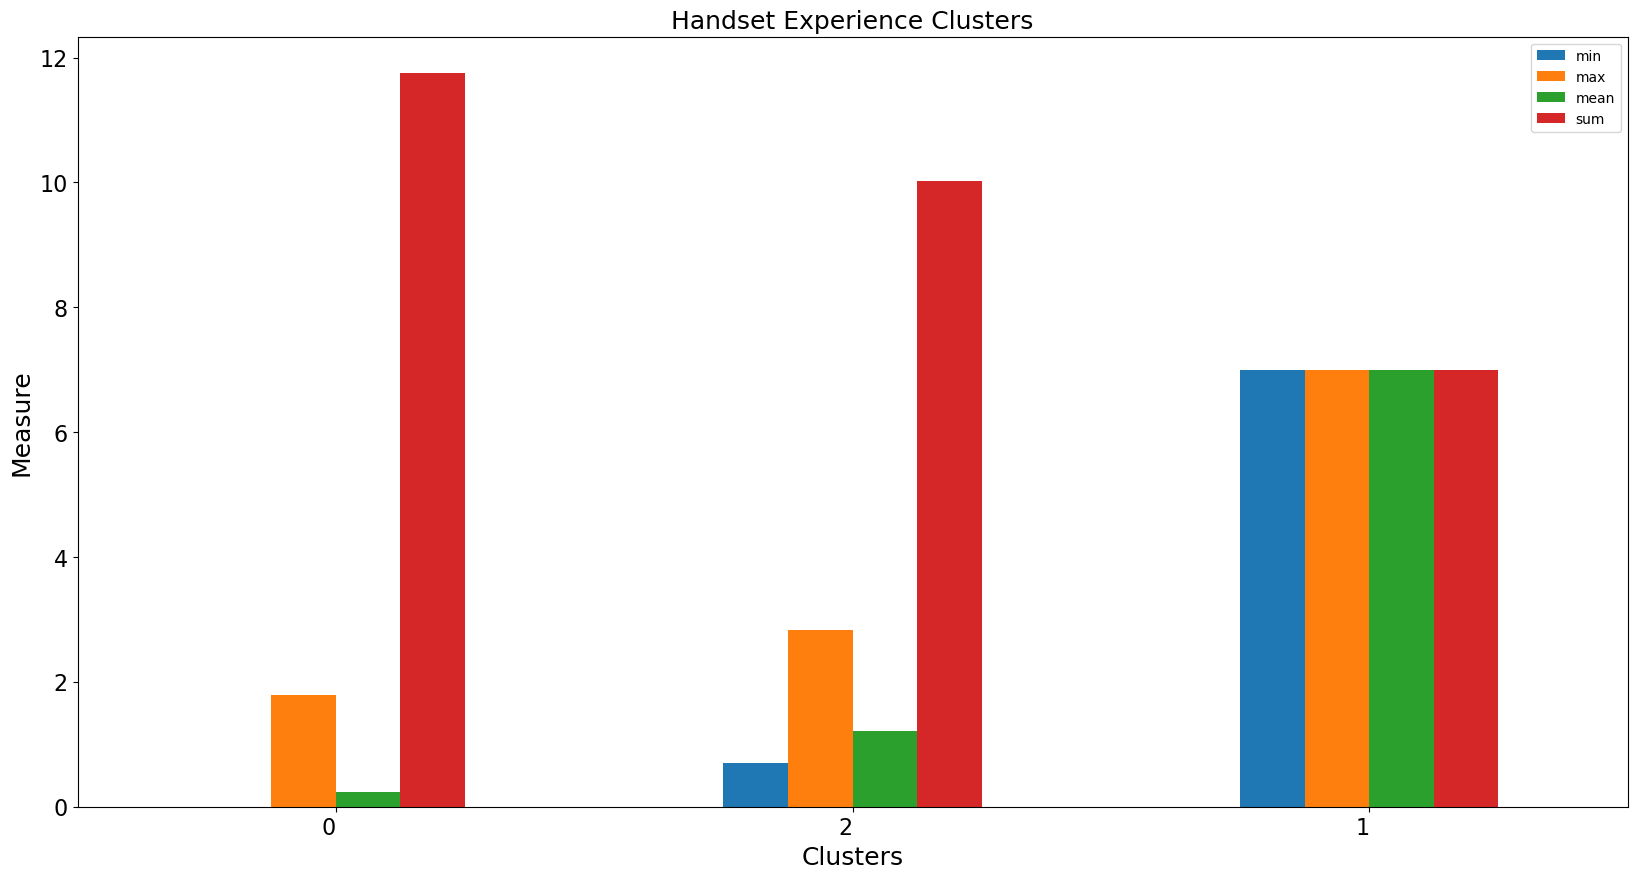

In [66]:
plt.figure(figsize=(50,60))
# topAppsAggLog.plot(figsize=(5,5));
ax= hands_exp.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("Handset Experience Clusters", fontsize=18)
plt.xticks(fontsize=16, rotation =0)
plt.yticks(fontsize=16) 
plt.xlabel('Clusters', fontsize=18)
plt.ylabel('Measure', fontsize=18)
plt.show()

- On average customers in clusters 0 have better Handset expereince than other clusters - There is a uniform distribution

- Customers in cluster 1 on average have the lowest Handset experience 